In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
from IPython.display import HTML,display

warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/Users/nishanthsundaran/intelligent/AQI'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head(5)

/Users/nishanthsundaran/intelligent/AQI/station_day.csv
/Users/nishanthsundaran/intelligent/AQI/.DS_Store
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/city_day.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm2_5.pkl
/Users/nishanthsundaran/intelligent/AQI/stations.csv
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_NO2.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_CO.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_pm2_5.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_pm10.pkl
/Users/nishanthsundaran/intelligent/AQI/saved models/Nishanthsarima_model_NO2.pkl


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2]:
df.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,26219,21930.000000,15453.000000,22986.000000,23002.000000,22176.000000,16372.000000,24258.000000,22675.000000,22559.000000,20932.000000,18664.000000,9412.000000,21937.000000
mean,2018-03-22 02:31:12.016476672,71.828907,125.492380,18.232528,29.009102,33.657667,25.336162,2.446235,14.988734,34.374248,3.300132,9.029794,3.155895,175.840908
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,2017-02-21 00:00:00,31.450000,60.990000,5.930000,11.850000,13.110000,9.197500,0.530000,5.560000,19.010000,0.130000,0.670000,0.120000,85.000000
50%,2018-06-14 00:00:00,52.220000,100.950000,10.150000,21.830000,24.300000,17.820000,0.930000,9.120000,30.890000,0.980000,2.850000,0.820000,124.000000
75%,2019-06-26 00:00:00,85.655000,158.460000,20.830000,37.890000,42.102500,32.600000,1.530000,15.595000,45.370000,2.850000,8.830000,3.232500,226.000000
max,2020-05-01 00:00:00,949.990000,1000.000000,351.300000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000
std,NaN,67.161387,94.179918,23.081236,25.158322,32.695931,27.109244,7.385259,19.087561,21.388968,16.699933,21.137700,6.644018,146.143064


In [3]:
df=df[['City','Date','AQI','AQI_Bucket','PM2.5', 'PM10', 'NO','SO2','NO2']]

In [4]:
cities=pd.unique(df['City'])
column1= cities+'SO2'
column2=cities+'_AQI_'
columns=[*column1,*column2]

In [5]:
final_df=pd.DataFrame(index=np.arange('2015-01-01','2020-05-02',dtype='datetime64[D]'),columns=column1)
for city,i in zip(cities,final_df.columns):
    n=len(np.array(df[df['City']==city]['SO2']))
    final_df[i][-n:]=np.array(df[df['City']==city]['SO2'])

In [6]:
final_df=final_df.astype('float64')
final_df=final_df.resample(rule='MS').mean()

In [7]:
final_df.tail()

,AhmedabadSO2,AizawlSO2,AmaravatiSO2,AmritsarSO2,BengaluruSO2,BhopalSO2,BrajrajnagarSO2,ChandigarhSO2,ChennaiSO2,DelhiSO2,...,JaipurSO2,JorapokharSO2,KochiSO2,KolkataSO2,LucknowSO2,MumbaiSO2,PatnaSO2,ShillongSO2,TalcherSO2,ThiruvananthapuramSO2
2020-01-01,51.154516,NaN,17.887097,9.792258,7.580323,11.571290,4.855517,7.618710,14.273871,11.366452,...,11.964194,27.269677,8.035000,13.980968,12.499355,8.964516,9.718065,6.962581,15.235161,8.728387
2020-02-01,56.185172,NaN,19.136552,9.785556,7.236897,19.882759,5.617143,9.098621,12.712759,14.945172,...,13.959310,30.512500,20.871379,14.952069,8.035517,10.515862,8.400345,7.927778,25.742414,7.530345
2020-03-01,43.710645,5.827143,20.670000,11.515161,6.867097,12.471786,4.274762,9.931935,7.834839,14.000000,...,12.932258,31.286774,20.967419,11.490323,6.233548,11.102903,10.960000,5.367742,37.349545,6.283226
2020-04-01,25.332667,6.852667,17.275652,8.484000,5.991000,13.397917,4.695667,10.721667,5.399667,15.493667,...,12.830667,32.927333,16.766333,7.916000,7.212667,8.885667,10.608667,8.124000,31.502500,5.597667
2020-05-01,3.960000,5.910000,27.100000,7.040000,5.360000,8.120000,5.190000,14.480000,8.330000,17.120000,...,22.510000,27.900000,19.360000,5.200000,6.180000,16.970000,7.860000,3.300000,NaN,7.100000


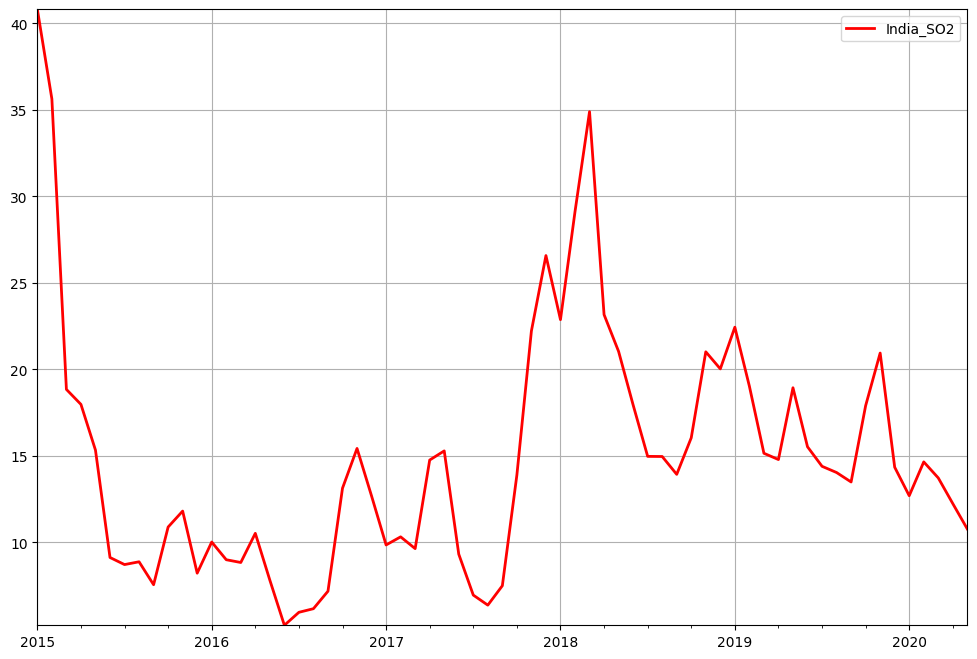

In [8]:
final_df['India_SO2']=final_df.mean(axis=1)
ax=final_df[['India_SO2']].plot(figsize=(12,8),grid=True,lw=2,color='Red')
ax.autoscale(enable=True, axis='both', tight=True)

In [9]:
df_2019=final_df['2019-01-01':'2020-01-01']
df_2019.head()

,AhmedabadSO2,AizawlSO2,AmaravatiSO2,AmritsarSO2,BengaluruSO2,BhopalSO2,BrajrajnagarSO2,ChandigarhSO2,ChennaiSO2,DelhiSO2,...,JorapokharSO2,KochiSO2,KolkataSO2,LucknowSO2,MumbaiSO2,PatnaSO2,ShillongSO2,TalcherSO2,ThiruvananthapuramSO2,India_SO2
2019-01-01,63.513226,NaN,19.841290,2.932308,5.853226,NaN,15.994516,NaN,14.787742,16.771290,...,72.910968,NaN,17.418710,8.914194,23.846774,36.208710,NaN,26.393333,16.393871,22.435000
2019-02-01,51.027143,NaN,12.095000,5.728000,4.931429,NaN,16.246429,NaN,12.797857,15.842500,...,72.708750,NaN,15.595714,7.726429,18.031786,40.109643,NaN,15.063214,5.244643,19.026021
2019-03-01,46.618710,NaN,11.008387,2.350000,5.929677,NaN,7.083871,NaN,9.267419,18.183226,...,11.334828,NaN,10.993226,9.880645,10.661935,40.308387,NaN,29.274138,4.070000,15.146788
2019-04-01,33.952143,NaN,13.928000,NaN,5.292667,NaN,8.109444,NaN,6.579333,21.647333,...,7.544000,NaN,6.096000,8.022333,22.824333,44.245000,NaN,26.160690,2.011000,14.783448
2019-05-01,100.346786,NaN,19.762581,25.399667,4.347742,NaN,6.706842,NaN,6.292903,19.662581,...,9.080000,NaN,2.155161,6.629355,18.583548,39.935161,NaN,26.759333,2.987742,18.934357


In [10]:
df_2019.isna().sum()

AhmedabadSO2              0
AizawlSO2                13
AmaravatiSO2              1
AmritsarSO2               1
BengaluruSO2              0
BhopalSO2                 8
BrajrajnagarSO2           0
ChandigarhSO2             8
ChennaiSO2                0
DelhiSO2                  0
ErnakulamSO2             12
GurugramSO2               0
GuwahatiSO2               1
HyderabadSO2              0
JaipurSO2                 0
JorapokharSO2             0
KochiSO2                 12
KolkataSO2                0
LucknowSO2                0
MumbaiSO2                 0
PatnaSO2                  0
ShillongSO2               7
TalcherSO2                0
ThiruvananthapuramSO2     0
India_SO2                 0
dtype: int64

In [11]:
df_2019=df_2019.drop(['AizawlSO2','ErnakulamSO2','KochiSO2',],axis=1)

In [12]:
SO2_2019 = df_2019.mean(axis=0)

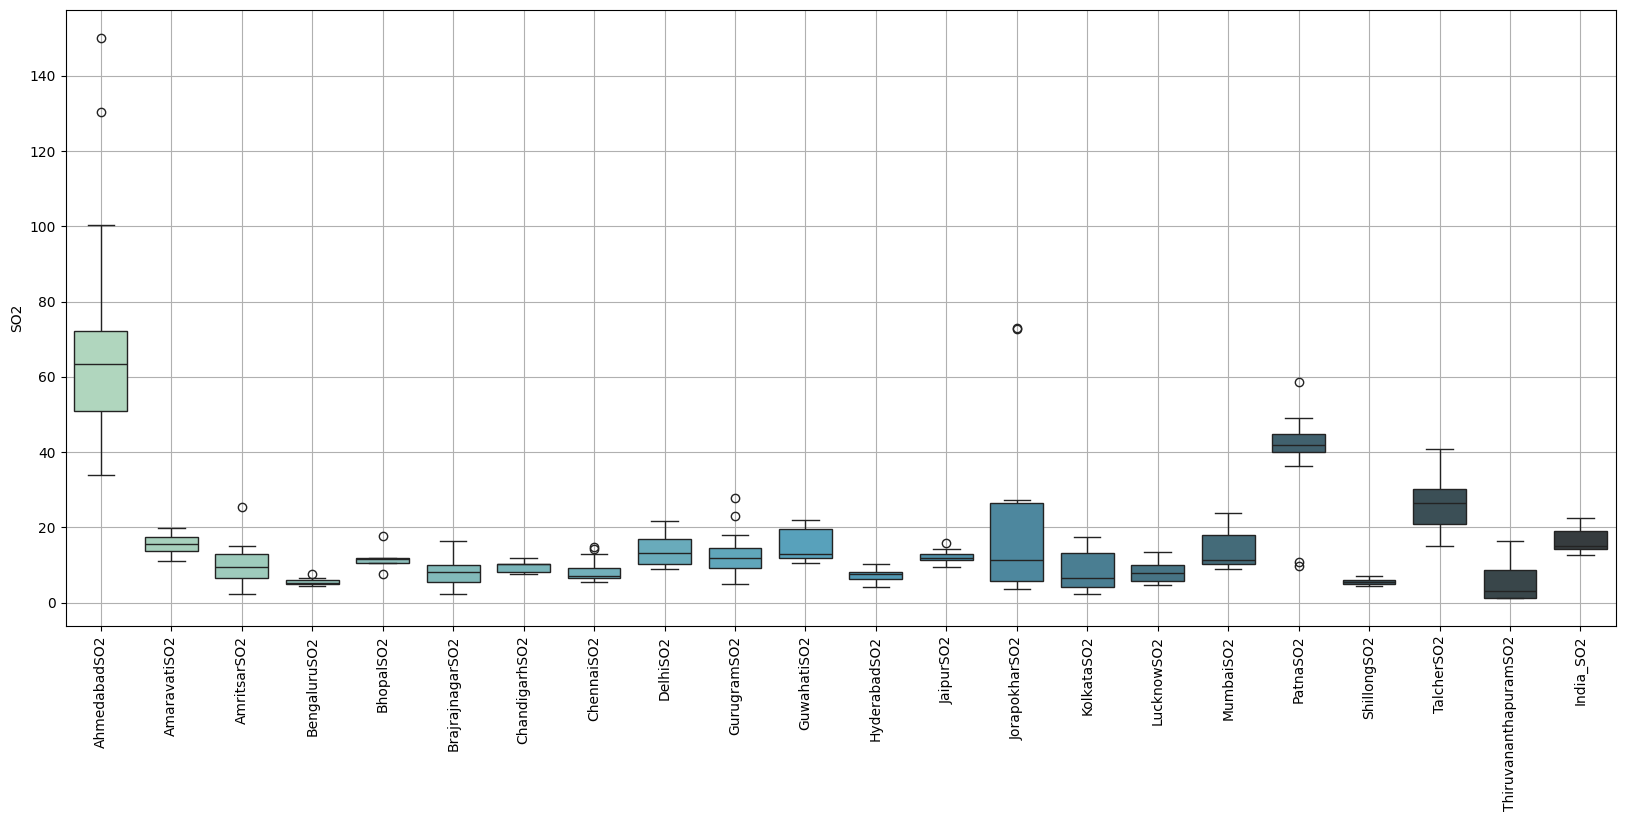

In [13]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
bplot = sns.boxplot( data=df_2019,  width=0.75,palette="GnBu_d")
plt.ylabel('SO2');
bplot.grid(True)

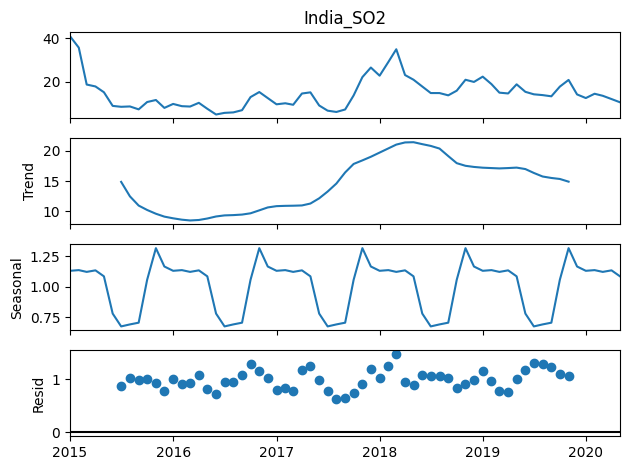

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
India_SO2=final_df['India_SO2']
result=seasonal_decompose(India_SO2,model='multiplicative')
result.plot();

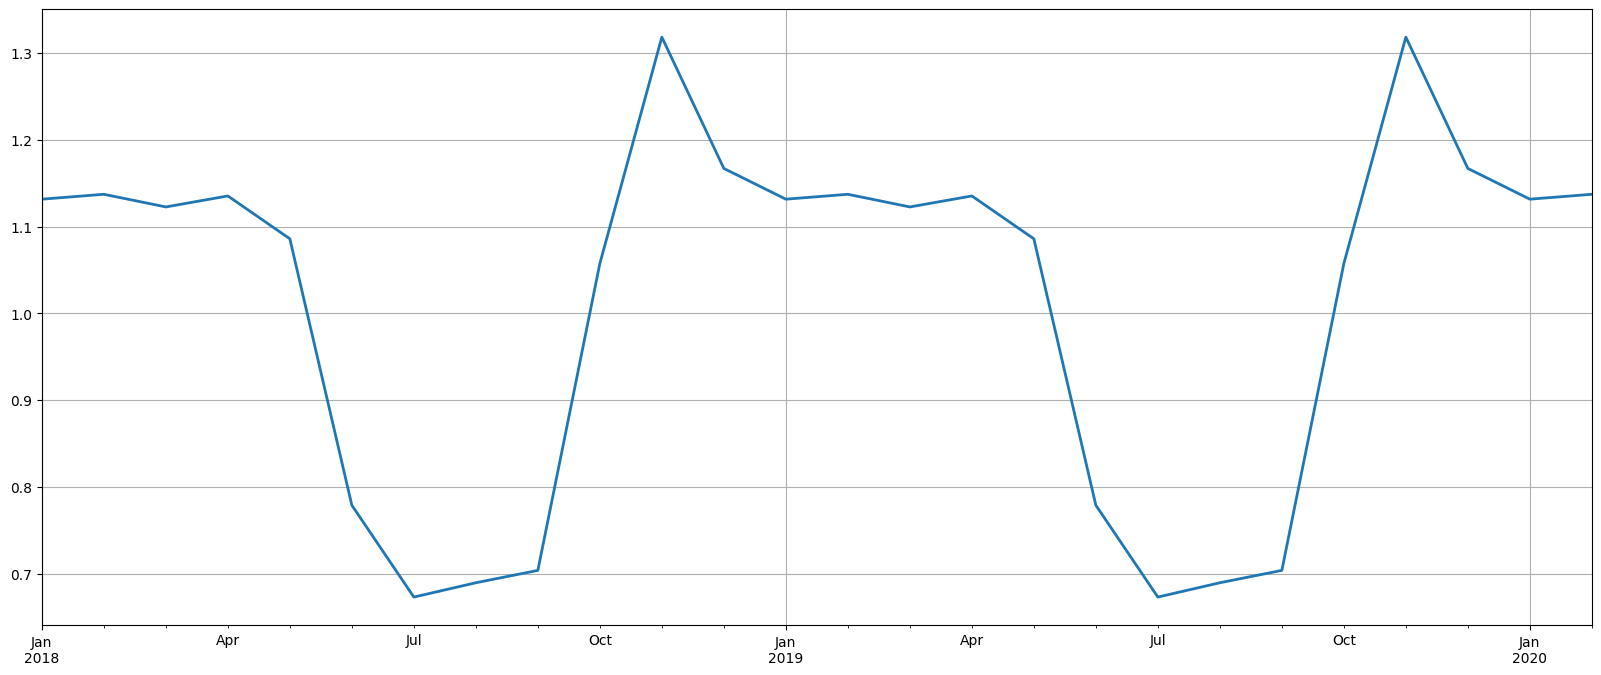

In [16]:
from matplotlib import dates
ax=result.seasonal.plot(xlim=['2018-01-01','2020-02-10'],figsize=(20,8),lw=2)
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [17]:
# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima;  

In [18]:
auto_arima(y=India_SO2,start_p=0,start_P=0,start_q=0,start_Q=0,seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   65
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -179.873
Date:                Thu, 04 Jan 2024   AIC                            367.745
Time:                        13:50:56   BIC                            376.443
Sample:                    01-01-2015   HQIC                           371.177
                         - 05-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7383      2.180      2.173      0.030       0.465       9.011
ar.L1          0.6979      0.086      8.141      0.000       0.530       0.866
ma.L1          0.5747      0.113      5.069      0.000       0.353       0.797
sigma2        14.4378      2.472      5.840      0.000       9.592      19.284
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 8.26
Prob(Q):                              0.13   Prob(JB):                         0.02
Heteroskedasticity (H):               0.40   Skew:                             0.57
Prob(H) (two-sided):                  0.04   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
len(India_SO2)

65

In [21]:
#dividing into train and test:
train=India_SO2[:41]
test=India_SO2[42:54] 

In [52]:
# Forming the model:
model=SARIMAX(train,order=(3,1,3),seasonal_order=(1,0,1,12),)
results=model.fit()
results.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76189D+00    |proj g|=  1.63703D-01

At iterate    5    f=  2.72591D+00    |proj g|=  3.10572D-02

At iterate   10    f=  2.71503D+00    |proj g|=  3.33348D-02

At iterate   15    f=  2.71084D+00    |proj g|=  4.78794D-02

At iterate   20    f=  2.70933D+00    |proj g|=  8.13375D-03

At iterate   25    f=  2.70925D+00    |proj g|=  4.56318D-03

At iterate   30    f=  2.70923D+00    |proj g|=  2.21505D-04

At iterate   35    f=  2.70923D+00    |proj g|=  2.24771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_SO2   No. Observations:                   41
Model:             SARIMAX(3, 1, 3)x(1, 0, [1], 12)   Log Likelihood                -111.078
Date:                              Thu, 04 Jan 2024   AIC                            240.157
Time:                                      14:02:08   BIC                            255.356
Sample:                                  01-01-2015   HQIC                           245.652
                                       - 05-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4159      0.458     -0.907      0.364      -1.314       0.482
ar.L2         -0.7373      0.399     -1.848      0.065      -1.519       0.045
ar.L3          0.1772      0.373      0.475      0.635      -0.554       0.908
ma.L1          0.8852      0.380      2.330      0.020       0.141       1.630
ma.L2          0.7048      0.464      1.520      0.129      -0.204       1.614
ma.L3          0.5312      0.385      1.378      0.168      -0.224       1.287
ar.S.L12       0.2256      1.516      0.149      0.882      -2.745       3.196
ma.S.L12      -0.0326      1.508     -0.022      0.983      -2.989       2.924
sigma2        14.0469      4.786      2.935      0.003       4.666      23.428
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.67
Prob(Q):                              0.84   Prob(JB):                         0.26
Heteroskedasticity (H):               1.04   Skew:                            -0.56
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
#Obtaining predicted values:
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')


<Axes: >

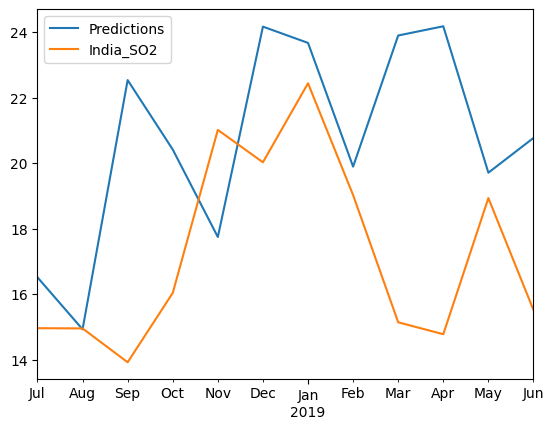

In [54]:
#Plotting predicted values against the true values:
predictions.plot(legend=True)
test.plot(legend=True)

In [55]:
from sklearn.metrics import mean_squared_error
RMSE=np.sqrt(mean_squared_error(predictions,test))
print('RMSE = ',RMSE)
print('Mean SO2',test.mean())

RMSE =  5.150680173952887
Mean SO2 17.231895010730653


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84475D+00    |proj g|=  2.84794D-01

At iterate    5    f=  2.71086D+00    |proj g|=  3.87394D-02

At iterate   10    f=  2.69218D+00    |proj g|=  4.69980D-02

At iterate   15    f=  2.68336D+00    |proj g|=  5.39983D-03

At iterate   20    f=  2.68324D+00    |proj g|=  1.34394D-03

At iterate   25    f=  2.68280D+00    |proj g|=  1.23848D-02

At iterate   30    f=  2.67975D+00    |proj g|=  1.89973D-02

At iterate   35    f=  2.67771D+00    |proj g|=  6.70070D-03

At iterate   40    f=  2.67659D+00    |proj g|=  3.66035D-03

At iterate   45    f=  2.67464D+00    |proj g|=  1.51594D-02

At iterate   50    f=  2.67165D+00    |proj g|=  6.42885D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/nishanthsundaran/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


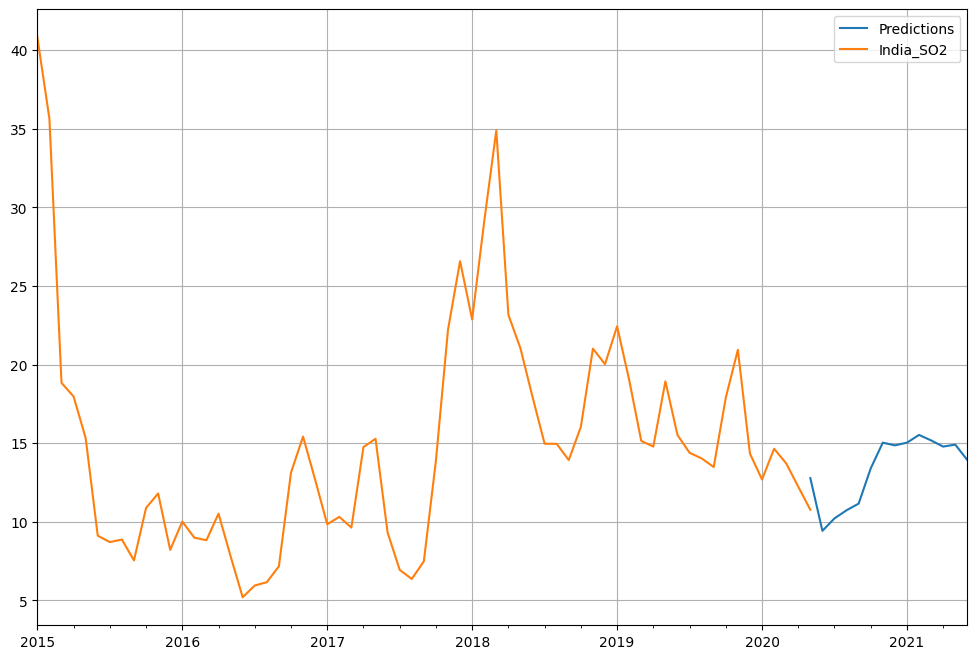

In [56]:
# Forming the model:
model=SARIMAX(India_SO2,order=(3,1,3),seasonal_order=(1,0,1,12))
results=model.fit()
results.summary()
#Obtaining predicted values:
predictions = results.predict(start=64, end=77, typ='levels').rename('Predictions')
#Plotting predicted values against the true values:
predictions.plot(legend=True)
India_SO2.plot(legend=True,figsize=(12,8),grid=True);

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.76189D+00    |proj g|=  1.63703D-01

At iterate    5    f=  2.72591D+00    |proj g|=  3.10572D-02

At iterate   10    f=  2.71503D+00    |proj g|=  3.33348D-02

At iterate   15    f=  2.71084D+00    |proj g|=  4.78794D-02

At iterate   20    f=  2.70933D+00    |proj g|=  8.13375D-03

At iterate   25    f=  2.70925D+00    |proj g|=  4.56318D-03

At iterate   30    f=  2.70923D+00    |proj g|=  2.21505D-04

At iterate   35    f=  2.70923D+00    |proj g|=  2.24771D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

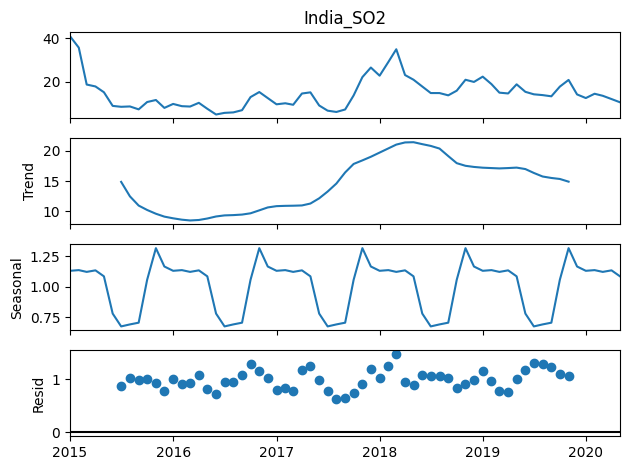

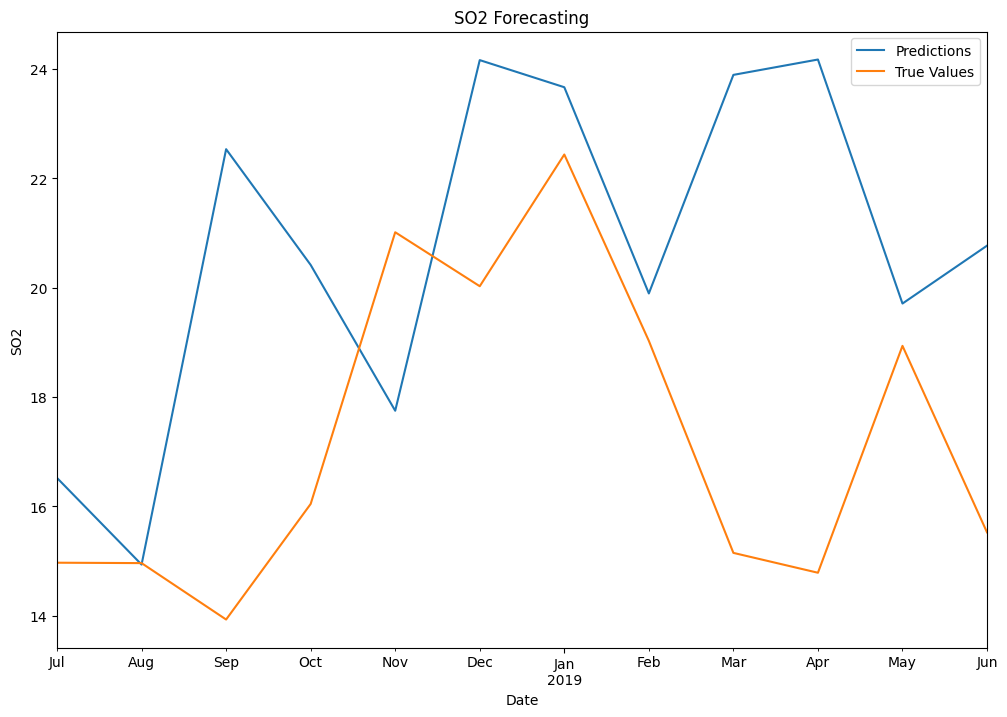

RMSE: 5.150680173952887
Mean SO2 (test data): 17.231895010730653


NameError: name 'predicted_PM2_specific_date' is not defined

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from IPython.display import HTML, display
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("/Users/nishanthsundaran/intelligent/AQI/city_day.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df[['City', 'Date', 'AQI', 'AQI_Bucket', 'PM2.5', 'PM10', 'NO', 'SO2', 'NO2', 'CO']]
cities = pd.unique(df['City'])
column1 = cities + 'SO2'
column2 = cities + '_AQI_'
columns = [*column1, *column2]
final_df = pd.DataFrame(index=np.arange('2015-01-01', '2020-05-02', dtype='datetime64[D]'), columns=column1)

for city, i in zip(cities, final_df.columns):
    n = len(np.array(df[df['City'] == city]['SO2']))
    final_df[i][-n:] = np.array(df[df['City'] == city]['SO2'])

final_df = final_df.astype('float64')
final_df = final_df.resample(rule='MS').mean()

final_df['India_SO2'] = final_df.mean(axis=1)

# Plot seasonal decomposition
India_SO2 = final_df['India_SO2']
result = seasonal_decompose(India_SO2, model='multiplicative')
result.plot();

# Load specific forecasting tools
auto_arima_result = auto_arima(y=India_SO2, start_p=0, start_P=0, start_q=0, start_Q=0, seasonal=True, m=12)

# Divide into train and test
train = India_SO2[:41]
test = India_SO2[42:54]

# Forming the model
model = SARIMAX(train, order=(3, 1, 3), seasonal_order=(1, 0, 1, 12))
results = model.fit()

# Obtain predicted values for the specific date
specific_date = '2020-06-01'
forecast = results.get_prediction(start=pd.to_datetime(specific_date), end=pd.to_datetime(specific_date), dynamic=False)
predicted_SO2_specific_date = forecast.predicted_mean.values[0]

# Plotting
predictions = results.predict(start=42, end=53, typ='levels').rename('Predictions')
plt.figure(figsize=(12, 8))
predictions.plot(legend=True, label='Predictions')
test.plot(legend=True, label='True Values')
plt.title('SO2 Forecasting')
plt.xlabel('Date')
plt.ylabel('SO2')
plt.show()

# Evaluate the performance
RMSE = np.sqrt(mean_squared_error(predictions, test))
print('RMSE:', RMSE)
print('Mean SO2 (test data):', test.mean())
print(f'Forecasted SO2 for {specific_date}: {predicted_PM2_specific_date}')

In [58]:
import pickle


# Save the trained model using pickle
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_SO2.pkl', 'wb') as file:
    pickle.dump(results, file)

In [59]:
import pickle
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the saved SARIMAX model
with open('/Users/nishanthsundaran/intelligent/AQI/Nishanthsarima_model_SO2.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Extend the time index to include the forecast period
extended_index = pd.date_range(start='2015-01-01', end='2025-12-31', freq='MS')

# Specify the specific date for forecasting
specific_date = '2020-06-01'

# Check if the specific date is within the range of the extended index
if pd.to_datetime(specific_date) not in extended_index:
    raise ValueError(f"'specific_date' should be within the range of the extended index.")

# Make predictions using the loaded model for the specific date
forecast = loaded_model.get_prediction(start=extended_index.get_loc(specific_date), end=extended_index.get_loc(specific_date), dynamic=False)
predicted_value = forecast.predicted_mean[0]

# Display the forecasted CO value for the specified date
print(f"The forecasted SO2 value for {specific_date} is: {predicted_value}")


The forecasted SO2 value for 2020-06-01 is: 20.902655214162262
